<a href="https://colab.research.google.com/github/SubrotoSarkhel/YesBank_Closing_Price/blob/main/Yes_bank_Stop_Closing_Price_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - <h3> Yes Bank stop price Predection



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

<h2>Business Context</h2>
<b>Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has
been in the news because of the fraud case involving Rana Kapoor. Owing to this
fact, it was interesting to see how that impacted the stock prices of the
company and whether Time series models or any other predictive models can
do justice to such situations. This dataset has monthly stock prices of the bank
since its inception and includes closing, starting, highest, and lowest stock prices
of every month. The main objective is to predict the stock’s closing price of the
month.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


<H1> Predict the Closing Price of Yes-Bank.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# For Visulization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To Visulize the Predection and Residual Error in the regression Model
from yellowbrick.regressor import PredictionError, ResidualsPlot
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = '/content/drive/MyDrive/Alma_better Course/ML by Alma-Better/Data by Alma_better/data_YesBank_StockPrices.csv'

In [4]:
yesbank = pd.read_csv(dataset)

### Dataset First View

In [5]:
# Dataset First Look
yesbank.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
yesbank.shape

(185, 5)

### Dataset Information

In [7]:
# Dataset Info
yesbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
yesbank[yesbank.duplicated()].count()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
pd.isna(yesbank).sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

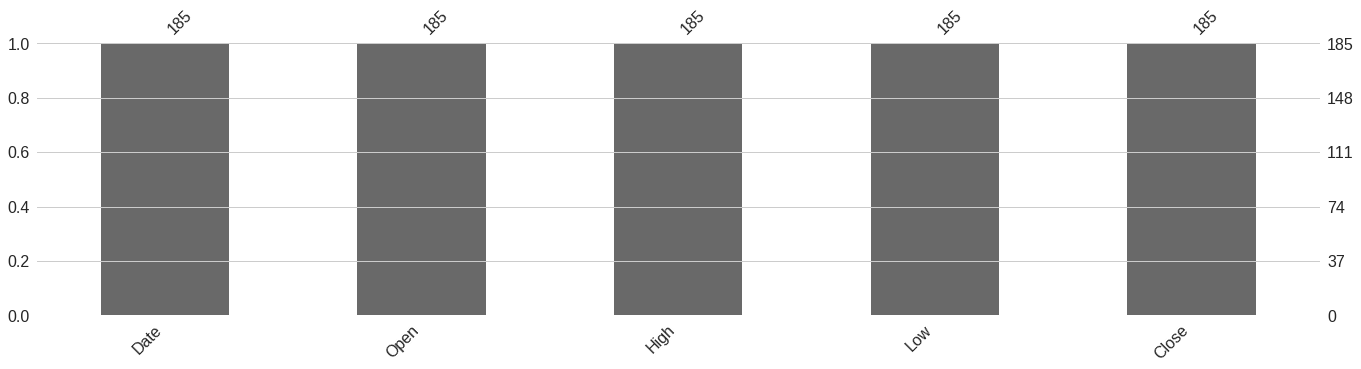

In [10]:
# Visualizing the missing values

import missingno as msno
# Visualize the correlation between the number of
# missing values in different columns as a heatmap

msno.bar(yesbank,figsize=(23,5));

### What did you know about your dataset?

* The dataset **Yesbank** has Five columns 
* No null values
* No Duplicate Values
* Four Numerical colummns and One non-Numerical Column

<h3>The dataset is having the <b>OHLC price of YesBank

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
yesbank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Dataset Describe
yesbank.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

* All the Variables are Floating Point Number except the date variable
* All the data ranges form 5 to 400


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
yesbank.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
yesbank['Date']='01'+yesbank['Date']
dates=[]
for d in yesbank['Date']:
  date = d.replace('-','')
  dates.append(date)
               
yesbank['Date']= dates

# converting the string to datetime format
yesbank['Date'] = pd.to_datetime(yesbank['Date'], format='%d%b%y')

In [15]:
# Adding a new column to the dataframe
yesbank['month'] = pd.DatetimeIndex(yesbank['Date']).month
yesbank['year'] = pd.DatetimeIndex(yesbank['Date']).year

In [16]:
# Making the Date column as the index
yesbank.set_index('Date', inplace=True)

In [17]:
#for each year rank each month based on volatility lowest=1 Highest=12
ranked = yesbank['Close'].groupby(yesbank['Close'].index.year).rank()

#average the ranks over all years for each month
final = ranked.groupby(ranked.index.month).mean()

final.describe()

count    12.000000
mean      6.369792
std       0.675561
min       5.200000
25%       6.013542
50%       6.283333
75%       6.883333
max       7.333333
Name: Close, dtype: float64

In [18]:
final

Date
1     5.600000
2     5.200000
3     5.866667
4     7.333333
5     6.800000
6     6.066667
7     6.562500
8     6.062500
9     6.062500
10    7.250000
11    6.500000
12    7.133333
Name: Close, dtype: float64

In [19]:
for n in [1,2,3,4]:
  print(str(n))

1
2
3
4


### What all manipulations have you done and insights you found?

* Transforming <b>Date column to datetime dataytpe</b><br>
For better analysis and section wise Viewing
* Creating 2 new columns <b>month and year</b>
* Replacing the index with Date column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Showing the Distribuation of the Closing Price

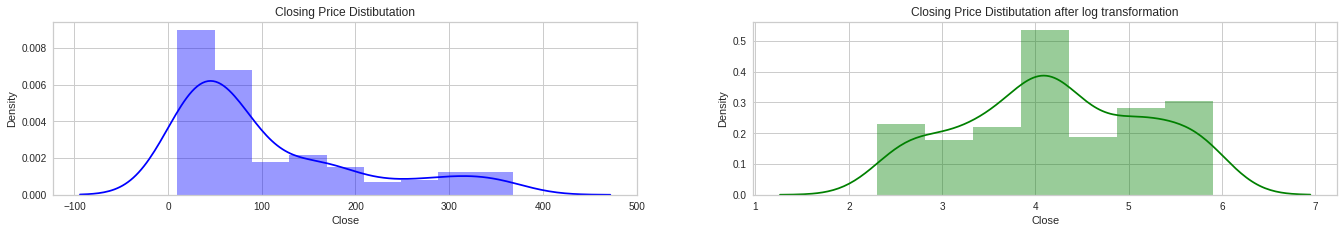

In [ ]:
# Chart - 6 visualization 

plt.figure(figsize=(23,7))
plt.subplot(221)
sns.distplot(yesbank['Close'],color='Blue');
plt.title("Closing Price Distibutation")
plt.subplot(222)
sns.distplot(np.log(yesbank['Close']),color='Green')
plt.title("Closing Price Distibutation after log transformation");


##### 1. Why did you pick the specific chart?

The **distplot** represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

##### 2. What is/are the insight(s) found from the chart?

**The Distibutation is Right-Skewed**. <br>
This condition occurs because probabilities taper off more slowly for higher values.

#### Chart - 2
Price Distributaion of OHLC w.r.t Time

In [20]:
fig = px.line(yesbank, x=yesbank.index, y=['Open','High','Low','Close'])
fig.show()

##### 1. Why did you pick the specific chart?

<h3> Line graphs or line charts are used to track variations over time, which over here is the best fit to Visulize the Price over Date

##### 2. What is/are the insight(s) found from the chart?

* From 2005 to 2008 the Price had some Posititve momentum
* From 2008 -2009 the Price had Droped 
* After May-2009 the Price shows a linear Positive move till Aug-2017
* Form Aug-2017 to Aug-2018 the Price consolidated in Range
* Form Sep-2018 to Dec-2018 the Price falls by 93%
* From mid of Dec-2018 to Mar-2019 the Price rised (181 to 275) by 34% <br>**and then Form there It Crashed**

#### Chart - 3
Relation between Closing Price with Open-High-Low prices

In [21]:
# Chart - 2 visualization code
fig=px.scatter(yesbank, x='Close', y=['Open','High','Low'])
fig.show()

##### 1. Why did you pick the specific chart?

I had Used scatter plot,  as this is a chart that shows the relationship between two variables.

The Reasons to use Scatter Chart :-

* To identify anomalies.
* To see how one variable affects another.
* To see a correlation, pattern, trend, or relationship.

##### 2. What is/are the insight(s) found from the chart?

* **Closing Price Shows a Linear Relation with other Price Points - Open-High-Low**
* Closing Price is highly correalted to OHL
* Max Price cluster is between 7 to 70 

#### **Chart - 4**
Relation Of Closing Price with Month

In [22]:
# Chart - 3 visualization code
fig = px.box(yesbank, x='month',y='Close')
fig.show()


##### 1. Why did you pick the specific chart?

**Box plot** are used to show distributions of numeric data values. AS it is built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

This show that the Closing Price had a Range
* The **Price Median** Ranges from **56 to 74**
* The **Price Falls** form Month of **June to August**

#### Chart - 5
Relation of <u>Closing Price with Year

In [23]:
# Chart - 4 visualization code

fig= px.box(yesbank, x='year', y='Close')
fig.show()

##### 1. Why did you pick the specific chart?

**Box plot** are used to show distributions of numeric data values. AS it is built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.


##### 2. What is/are the insight(s) found from the chart?

Since the Closing Price Shows an Upward Range till <b> year 2018 <br> 2018 was the Best Year for YesBank </b>


#### Chart - 6
Correlation Plot (HeatMap)

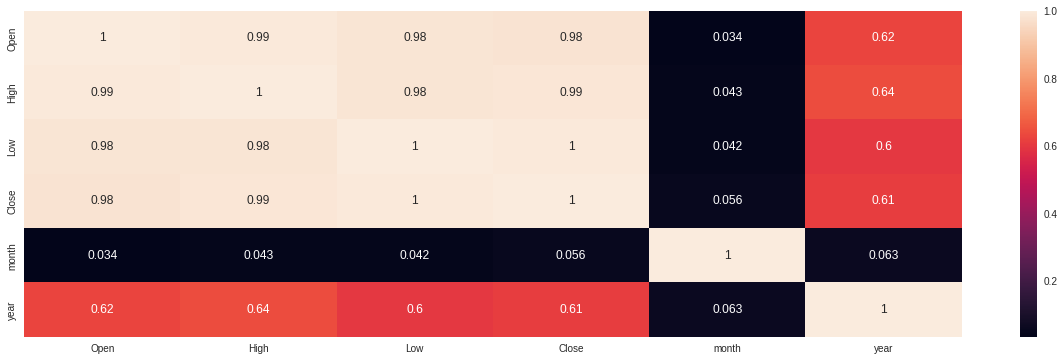

In [26]:
# Chart - 5 visualization code
plt.figure(figsize=(21,6))
cor = yesbank.corr()
sns.heatmap(abs(cor), annot=True);

##### 1. Why did you pick the specific chart?

**Correlation heatmaps** are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

##### 2. What is/are the insight(s) found from the chart?

* The Price is highly correlated with each-other
* Low-Close has Higher correation with each-other
* Month value has the least correlation 
* Price is around 60% correlated with Year

#### Chat 7
Montly volatility of the Closing price of each Year

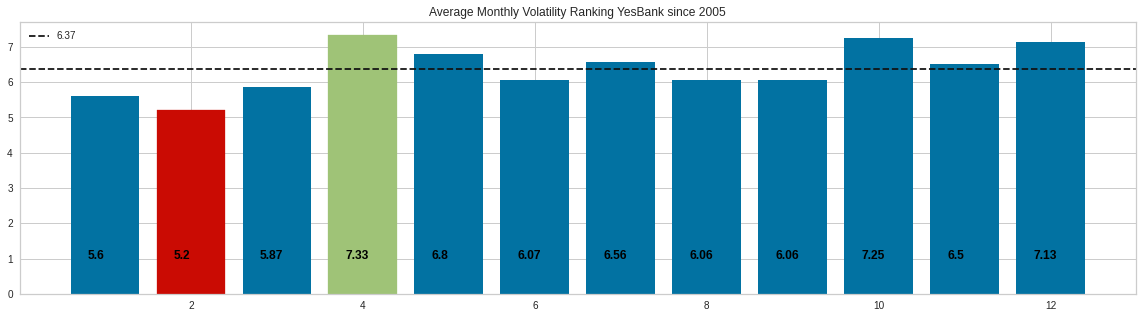

In [28]:
plt.figure(figsize=(20,5))
b_plot = plt.bar(x=final.index,height=final)
b_plot[3].set_color('g')
b_plot[1].set_color('r')
for i,v in enumerate(round(final,2)):
    plt.text(i+.8,1,str(v), color='black', fontweight='bold')
plt.axhline(final.mean(),ls='--',color='k',label=round(final.mean(),2))
plt.title('Average Monthly Volatility Ranking YesBank since 2005')

plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

The **Bar Plot** best to represent the bivariate distribution of data i.e. Distribuation of data against each other.

##### 2. What is/are the insight(s) found from the chart?

* The Mean of **average Volatility** of closing price of YesBank is **6.37** since 2005
  *   This shows that the Closing Price shows a move of 6.37 points on an Average

* **February** has the least Volatility of **5.2**
* **April** had the Highest Volatility of **7.33**
* **October** and **December** too had the Volatility greater than **7**
* From **May** to **September** the Volatility of the Price moved in a range of **6.06** to **6.80**


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

In [29]:
# Test for Normlity
from scipy import stats
skw = stats.skew(yesbank['Close'])
Kurt = stats.kurtosis(yesbank['Close'])
print('Skewness = ',skw,'\t', 'Kurtosis = ',Kurt)
# Shapiro test of Normality
stat, pvalue1 = stats.shapiro(yesbank['Close'])
stat, pvalue2 = stats.normaltest(yesbank['Close'])
print('Sphiro test pvalue=%0.16f '%pvalue1)
print('normaltest test pvalue=%0.16f '%pvalue2)

Skewness =  1.254447477233428 	 Kurtosis =  0.445074120294612
Sphiro test pvalue=0.0000000000000569 
normaltest test pvalue=0.0000000187971662 


* **Kurtosis** represent that the data is **Normaly Distributed**

* **Skewness is 1.254** with is **greater than 1** which represent that the Data is **highly skewed** 

* **Shapiro test and Normaltest of Normality is less than 0.05** which also represent that Closing Price is not Normally Distributed

* From the **Chart 6** , we can see that the **data is Right-Skewed**

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - Closing Price depends on the Open Price<br>
Alternate Hypothesis - Closing Price does not depends on Open Price 

#### 2. Perform an appropriate statistical test.

In [30]:
# Since both the values are Numerical, Hence using Correlation test 
# Performing Spearman and Pearson correlaiton test
from scipy import stats
s, pvalue = stats.spearmanr(yesbank['Close'], yesbank['Open'])
print('Spearman Correlation value = ',s ,'\t','P-value =', pvalue)
s2, pvalue2 = stats.pearsonr(yesbank['Close'], yesbank['Open'])
print('Pearson Correlation value =',s2 ,'\t','P-value = ',pvalue2)

Spearman Correlation value =  0.9795894579336665 	 P-value = 1.8505177371307317e-129
Pearson Correlation value = 0.9779710062230934 	 P-value =  1.852774505867169e-126


* Both Spearman and Pearson correlation value is Closer to +1
<br>*Hence The Closing Price have higher Positive Correlation with The Opening Price*

* P-value is less than 0.05 
<br>*which means we Failed to reject the Null Hypothesis*
<br>**The Closing Price has a dependence on the Opening Price**

##### Which statistical test have you done to obtain P-Value?

**I had performed the Spearman and Pearson test of Correlation to Obtain the P-value and the correlation value**

##### Why did you choose the specific statistical test?

**Since Both the Features are Numerical , the correlation test suit the best !!**

## ***6. Feature Engineering & Data Pre-processing***

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [31]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
calc_vif(yesbank[[i for i in yesbank.describe().columns if i not in ['Close','Date','High','Low']]])

,variables,VIF
0,Open,2.154747
1,month,4.655038
2,year,5.958031


#### 2. Feature Selection

In [33]:
yesbank.reset_index(inplace=True)

In [34]:
# Select your features wisely to avoid overfitting
features = yesbank[['Open','month']]

In [35]:
features.head(2)

,Open,month
0,13.00,7
1,12.58,8


##### What all feature selection methods have you used  and why?

<h3>Checked for Multicollinearlity using the VIF to find the best Feature with least correlation

##### Which all features you found important and why?

<h3>Open, Month and Year are found important as they have the least correlation with the Closing Price.

But as an Input variable I have Used Open price only as month and Year aren't that relevent

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [36]:
# Transform Your data
output = np.log(yesbank['Close'].values)

Used Log Transformed as the data is highly right skewed and this is the simplest way to transform it to normal distribution

### 6. Data Scaling

In [37]:
# Scaling your data

from scipy.stats import zscore
input = features.apply(zscore)

##### Which method have you used to scale you data and why?

I have used zscore scaling to ensure your feature distributions have mean = 0 and std = 1. I had choosen it as the data had very less Outliers.

### 8. Data Splitting

In [38]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2,random_state=0)


In [39]:
# showing the shape of X-train and X-test
print(x_train.shape,'\n', x_test.shape)

(148, 2) 
 (37, 2)


##### What data splitting ratio have you used and why? 

<h4>Here I had Used 80:20 ratio for Train and Test data.
Simply to have more data in the test for better prediction

## ***7. ML Model Implementation***

### ML Model - 1

Normal Linear Regression

In [40]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
# Fit the Algorithm
reg = LinearRegression().fit(x_train,y_train)

# Predict on the model
y_pred = reg.predict(x_test)

In [41]:
metric_score = pd.DataFrame(columns=['Model','Model_accuracy','MSE',"RMSE",'R2_score,'])

In [42]:
# Check the Accuracy Score
acc = reg.score(x_train,y_train)*100

# Find the MSE, RSME and R2-score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f'Model Accuracy = {acc}\nMSE = {mse}\nRMSE={rmse}\nR2-score={r2} ')
metric_score.loc[len(metric_score.index)]=['Model-1 Linear Regression', acc, mse,rmse,r2]

Model Accuracy = 78.86538414602323
MSE = 0.17814913731392545
RMSE=0.4220771698563255
R2-score=0.8196232004130596 


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

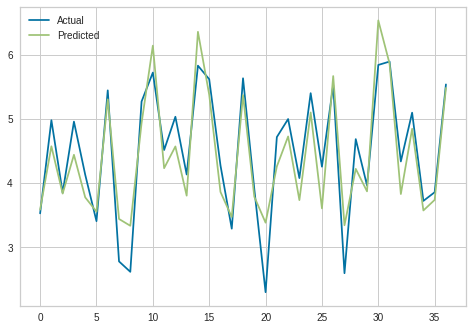

In [43]:
# Visulization of Actual and Predicted Closing Price of YesBank
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual','Predicted'])
plt.show()


<b>Visualizing the Prediction Error and Residual Error 

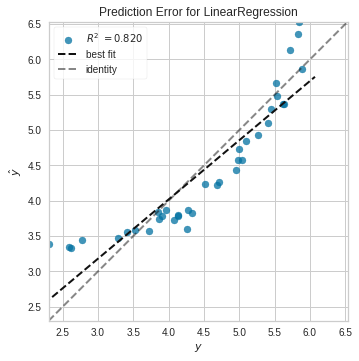

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [44]:
model1 = LinearRegression()
# visualizing The Prediction Error of Model-1
visualizer = PredictionError(model1)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

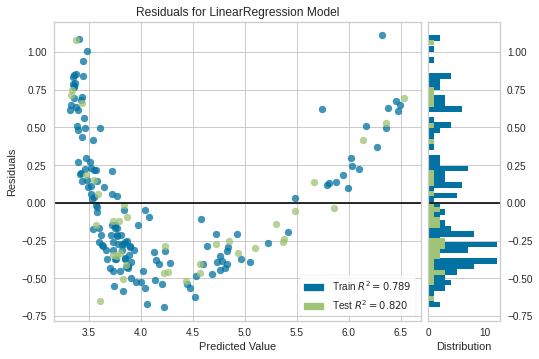

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
# visualizing the Residual Error of Model-1
visualizer = ResidualsPlot(model1)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

### ML Model - 2
Lasso Regression

In [46]:
# importing lasso regression
from sklearn.linear_model import Lasso
las_reg = Lasso(alpha=0.001 , max_iter= 300)

# model fitting
las_reg.fit(x_train, y_train)

# Predicting the Model
y_pred_lasso = las_reg.predict(x_test)

In [47]:
# Finding the Lasso Score
scr = las_reg.score(x_train,y_train)*100

# Calculating the Evaluation Metics
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)

print(f'Lasso_score = {scr}\nMSE = {mse_lasso}\nRMSE = {rmse_lasso}\nR2-score = {r2_lasso} ')
metric_score.loc[len(metric_score.index)]=['Model-2 Lasso Regression', scr, mse_lasso,rmse_lasso,r2_lasso]

Lasso_score = 78.865170275636
MSE = 0.17803091307785623
RMSE = 0.4219370961148785
R2-score = 0.8197429029816901 


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

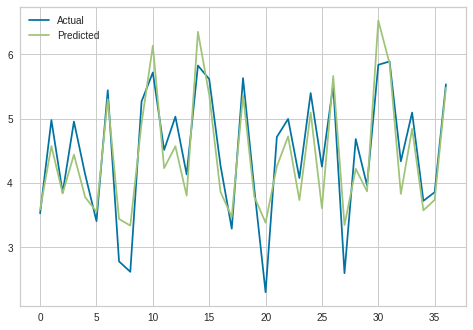

In [48]:
# Visualizing evaluation Metric Score chart
plt.plot(y_test)
plt.plot(y_pred_lasso)
plt.legend(['Actual','Predicted'])
plt.show()

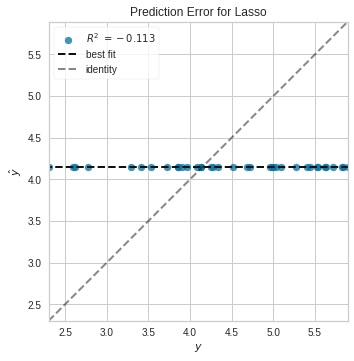

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [49]:
model2 = Lasso()
visualizer = PredictionError(model2)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

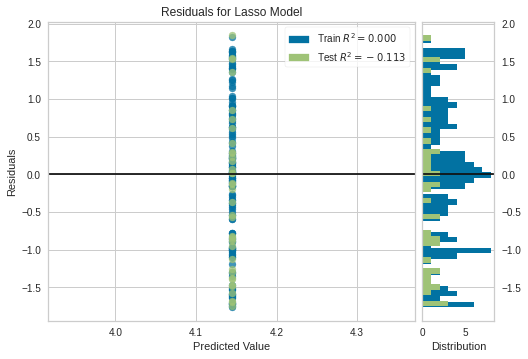

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:

visualizer = ResidualsPlot(model2)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

#### 2. Cross- Validation & Hyperparameter Tuning

In [51]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm
lasso = Lasso()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

# Predict on the model
y_pred_lasso2 = lasso_regressor.predict(x_test)


In [52]:
# Finding the Lasso Score after Cross Validation
scr = lasso_regressor.score(x_train,y_train)*100

# Calculating the Evaluation Metics
mse_lasso = mean_squared_error(y_test,y_pred_lasso2)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso2)
print(f'Lasso_score = {scr}\nMSE = {mse_lasso}\nRMSE = {rmse_lasso}\nR2-score = {r2_lasso} ')
metric_score.loc[len(metric_score.index)]=['Model-2 Lasso Regression after-CV', scr, mse_lasso,rmse_lasso,r2_lasso]

Lasso_score = -19.676290379412205
MSE = 0.17798491236741484
RMSE = 0.42188258125622446
R2-score = 0.8197894789070818 


##### Which hyperparameter optimization technique have you used and why?

I Had Used GridSearchCV hyperparameter optimization technique, to find the best combination of hyperparameter

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

<h3>It doesn't shows any such improvement, As the Input feature doesn't have only two Columns

### ML Model - 3
<h3>Ridge Regression

In [53]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge
# Fit the Algorithm
rid_reg = Ridge(alpha=0.001, max_iter = 300)
rid_reg.fit(x_train,y_train)
# Predict on the model
y_pred_rid = rid_reg.predict(x_test)

In [54]:
# Findind the score 
scr_rid = rid_reg.score(x_train,y_train)*100

# Calculating the evaluation metics score
mse = mean_squared_error(y_test,y_pred_rid)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_rid)
print(f'Ridge_score = {scr_rid}\nMSE = {mse}\nRMSE = {rmse}\nR2-score = {r2} ')
metric_score.loc[len(metric_score.index)] = ['Model-3 Ridge Regression',scr_rid,mse,rmse,r2] 

Ridge_score = 78.86538414209355
MSE = 0.17814919474823557
RMSE = 0.42207723789400864
R2-score = 0.8196231422605633 


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

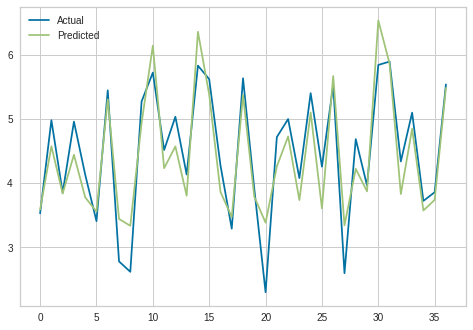

In [55]:
# Visualizing evaluation Metric Score chart
plt.plot(y_test)
plt.plot(y_pred_rid)
plt.legend(['Actual','Predicted'])
plt.show()

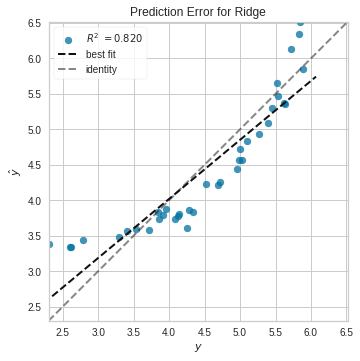

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [56]:
model3 = Ridge()
visualizer = PredictionError(model3)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

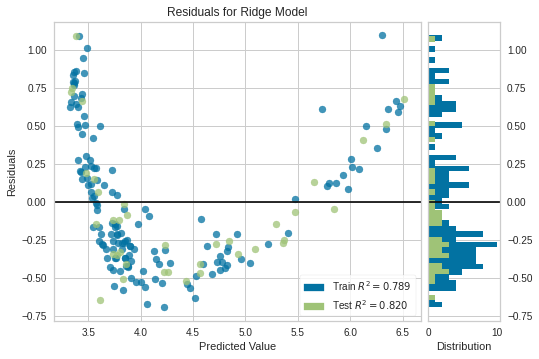

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [57]:
# Visualization of the Residual Plot
visualizer = ResidualsPlot(model3)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm
ridge = Ridge()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)

# Predict on the model
y_pred_ridge = ridge_regressor.predict(x_test)

In [59]:
# Finding the Ridge Score after Cross Validation
scr_rid2 = ridge_regressor.score(x_train,y_train)*100

# Calculating the Evaluation Metics
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)

print(f'Ridge_score = {scr_rid2}\nMSE = {mse_ridge}\nRMSE = {rmse_ridge}\nR2-score = {r2_ridge} ')
metric_score.loc[len(metric_score.index)] = ['Model-3 Ridge Regression after_CV',scr_rid2,mse_ridge,rmse_ridge,r2_ridge] 

Ridge_score = -19.679507355079366
MSE = 0.17825121960088783
RMSE = 0.4221980810009537
R2-score = 0.8195198416402111 


##### Which hyperparameter optimization technique have you used and why?

I Had Used **GridSearchCV** hyperparameter optimization technique, to find the best combination of hyperparameter as this checks all the values to find the best combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No ! not as such any improvement is Noted as there is only two features in Input column

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [60]:
metric_score

,Model,Model_accuracy,MSE,RMSE,"R2_score,"
0,Model-1 Linear Regression,78.865384,0.178149,0.422077,0.819623
1,Model-2 Lasso Regression,78.865170,0.178031,0.421937,0.819743
2,Model-2 Lasso Regression after-CV,-19.676290,0.177985,0.421883,0.819789
3,Model-3 Ridge Regression,78.865384,0.178149,0.422077,0.819623
4,Model-3 Ridge Regression after_CV,-19.679507,0.178251,0.422198,0.819520


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen Model-1 as this the best and the simplest one.
Since the Data had very less noice the L1(lasso) and L2(ridge) doesn't made such improvement

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***